# Практика

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import statsmodels.stats.weightstats as ssw
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [25]:
# ваш код тут
k = 2
VAR = 2 * k
MEAN = k
chi2_rv = sts.chi2(df=k)
sample = chi2_rv.rvs(10)
sample

array([1.64518787, 0.75388057, 1.09455298, 0.55239331, 1.59625718,
       1.61976262, 0.14810213, 1.76012452, 2.37326368, 3.68382239])

In [26]:
sample.dtype

dtype('float64')

In [27]:
real_mean = chi2_rv.mean() # настоящее среднее случайной величины

In [28]:
real_var = chi2_rv.var() # настоящая дисперсия случайной величины

### Постройте гистограмму выборки и теоретическую плотность распределения

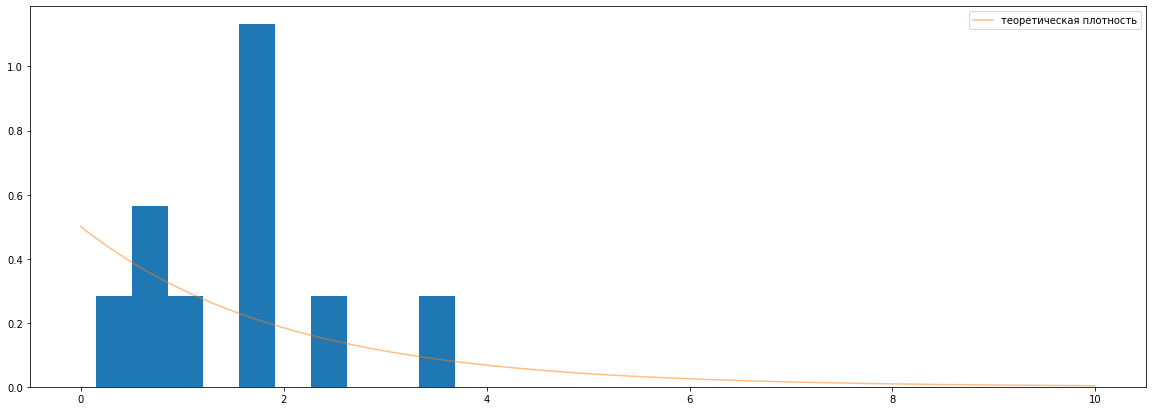

In [29]:
# ваш код тут
x = np.linspace(0, 10, 1000)
pdf = chi2_rv.pdf(x)

plt.figure(figsize=(20,7))
plt.hist(sample, density=True)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()
plt.show()

In [30]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.5227347234080424
0.9085521627599669


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

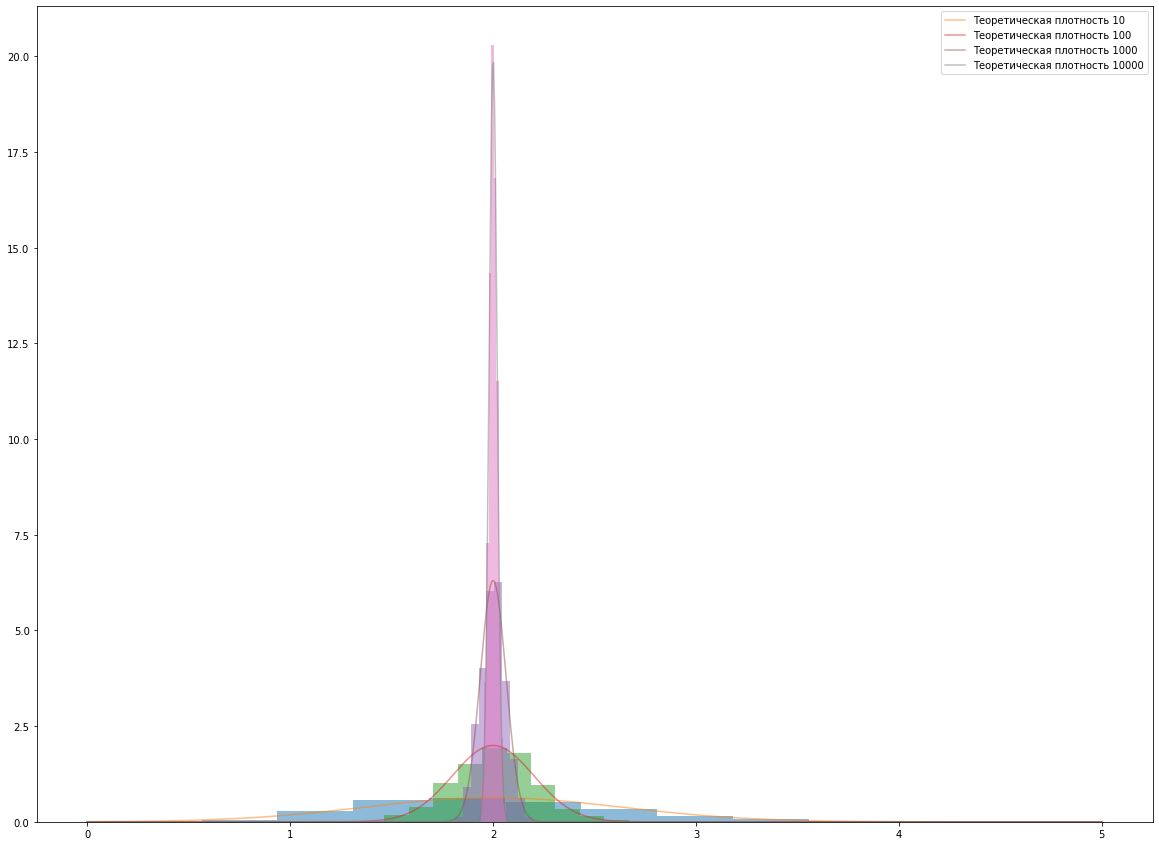

In [31]:
# ваш код тут
plt.figure(figsize=(20,15))
for N in [10, 100, 1000, 10000]:
  means = []
  for i in range(1000):
    means.append(np.mean(chi2_rv.rvs(N)))

  # получаем нормальное распределение
  x = np.linspace(0, 5, 1000)
  norm_rv = sts.norm(loc=MEAN, scale=np.sqrt(VAR) / np.sqrt(N))
  pdf = norm_rv.pdf(x)

  # рисуем средние значения + нормальное распределение
  plt.hist(means, density=True, alpha=0.5)
  plt.plot(x, pdf, label=f'Теоретическая плотность {N}', alpha=0.5)
  plt.legend()
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**  хорошо, значения на всех выборках стремятся к 2.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [32]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [33]:
# Сформируем наборы данных по ушедшим и оставшимся:
churn_true = df['total day calls'].loc[df['churn'] == True]
churn_false = df['total day calls'].loc[df['churn'] == False]

In [34]:
churn_true.describe()

count    483.000000
mean     101.335404
std       21.582307
min        0.000000
25%       87.500000
50%      103.000000
75%      116.500000
max      165.000000
Name: total day calls, dtype: float64

In [35]:
churn_false.describe()

count    2850.000000
mean      100.283158
std        19.801157
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       163.000000
Name: total day calls, dtype: float64

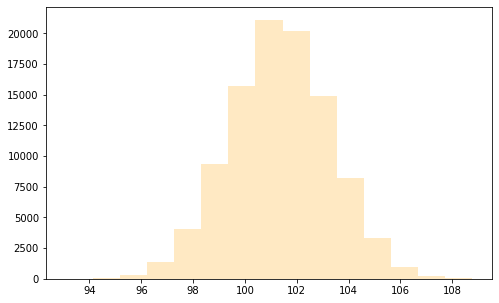

101.34344660000001


In [36]:
# Используя ЦПТ cформируем выборки и построим график с полученным средним по ушедшим:
mean_churn_true = []
n = 100
for i in range(100000):
    mean_churn_true += [churn_true.sample(n).mean()]
plt.figure(figsize=(8, 5))
plt.hist(mean_churn_true, alpha=0.8, color='#FFE4B5', bins=15)
plt.show()
print(np.mean(mean_churn_true))

In [37]:
# В pandas при использовании std параметр ddof=1 зашит по умолчанию
print("Довер-й интервал для среднего по ЦПТ, рассчитанный по формуле (ушедшие): \n[{}, {}] ".format(
    np.mean(mean_churn_true) - 1.96 * churn_true.std() / np.sqrt(n-1),
    np.mean(mean_churn_true) + 1.96 * churn_true.std() / np.sqrt(n-1)
))
print("Довер-й интервал для среднего по ЦПТ методом _zconfint_generic (ушедшие): \n{} ".format(
    ssw._zconfint_generic(np.mean(mean_churn_true),  churn_true.std(), alpha=0.95, alternative='two-sided')
))

Довер-й интервал для среднего по ЦПТ, рассчитанный по формуле (ушедшие): 
[97.09200376162222, 105.59488943837779] 
Довер-й интервал для среднего по ЦПТ методом _zconfint_generic (ушедшие): 
(99.99008965408746, 102.69680354591256) 


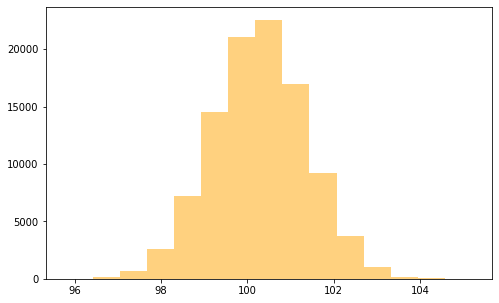

100.2829664


In [38]:
# Используя ЦПТ cформируем выборки и построим график с полученным средним по оставшимся:
mean_churn_false = []
n = 300
for i in range(100000):
    mean_churn_false += [churn_false.sample(n).mean()]
plt.figure(figsize=(8, 5))
plt.hist(mean_churn_false, alpha=0.5, color='#FFA500', bins=15)
plt.show()
print(np.mean(mean_churn_false))

In [39]:
print("Довер-й интервал для среднего по ЦПТ, рассчитанный по формуле (оставшиеся): \n[{}, {}] ".format(
    np.mean(mean_churn_false) - 1.96 * churn_false.std() / np.sqrt(n-1),
    np.mean(mean_churn_false) + 1.96 * churn_false.std() / np.sqrt(n-1)
))
print("Довер-й интервал для среднего по ЦПТ методом _zconfint_generic (оставшиеся): \n{} ".format(
    ssw._zconfint_generic(np.mean(mean_churn_false),  churn_false.std(), alpha=0.95, alternative='two-sided')
))

Довер-й интервал для среднего по ЦПТ, рассчитанный по формуле (оставшиеся): 
[98.03851067185452, 102.52742212814549] 
Довер-й интервал для среднего по ЦПТ методом _zconfint_generic (оставшиеся): 
(99.04129964800443, 101.52463315199559) 


По полученным результатам, метод _zconfint_generic характеризуется наиболее точными значениями доверительных интервалов, что позволяет с большей точностью определить границы среднего значения.